In [1]:
print("Asdasd")

Asdasd


In [66]:
 import pandas as pd
 import numpy as numpy
 import matplotlib.pyplot as plt
 import seaborn as sns
 import sklearn
 from statsmodels.formula.api import ols

In [67]:
weights = [87, 81, 82, 92, 90, 61, 86, 66, 69, 69]
height = [187, 174, 179, 192, 188, 160, 179, 168, 168, 174]

In [68]:
df = pd.DataFrame({'height' : height,
                   'weight' : weights})
df.head()

,height,weight
0,187,87
1,174,81
2,179,82
3,192,92
4,188,90


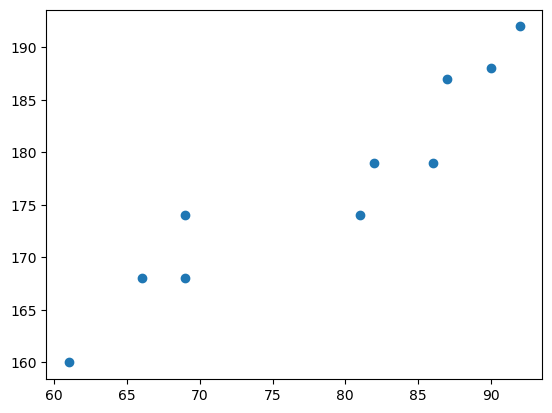

In [5]:
plt.scatter(df['weight'], df['height'])

In [7]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

In [8]:
X = df[['weight']]
y = df[['height']]

In [9]:
X.head()

,weight
0,87
1,81
2,82
3,92
4,90


In [10]:
y.head()

,height
0,187
1,174
2,179
3,192
4,188


In [11]:
reg.fit(X, y)

LinearRegression()

In [12]:
w1 = reg.coef_[0][0]
w0 = reg.intercept_[0]

In [13]:
print(f'y = {round(w1, 2)}x + {round(w0, 2)}')

y = 0.86x + 109.37


In [69]:
model = ols(formula='height ~ weight', data=df).fit()

In [70]:
model.summary()

d:\Users\dhwns\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 height   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     64.72
Date:                Wed, 31 Jan 2024   Prob (F-statistic):           4.19e-05
Time:                        20:57:05   Log-Likelihood:                -25.778
No. Observations:                  10   AIC:                             55.56
Df Residuals:                       8   BIC:                             56.16
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    109.3653      8.470     12.912      0.000      89.833     128.897
weight         0.8625      0.107      8.045      0.000       0.615       1.110
==============================================================================
Omnibus:                        0.397   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.820   Jarque-Bera (JB):                0.472
Skew:                          -0.164   Prob(JB):                        0.790
Kurtosis:                       1.988   Cond. No.                         594.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
model.summary().tables[2]

Omnibus:,0.397,Durbin-Watson:,1.969
Prob(Omnibus):,0.820,Jarque-Bera (JB):,0.472
Skew:,-0.164,Prob(JB):,0.790
Kurtosis:,1.988,Cond. No.,594.


In [16]:
df['pred'] = round(X * w1 + w0, 2)
display(df.head())

,height,weight,pred
0,187,87,184.40
1,174,81,179.23
2,179,82,180.09
3,192,92,188.72
4,188,90,186.99


In [17]:
df['error'] = df['height'] - df['pred']
df.head()

,height,weight,pred,error
0,187,87,184.40,2.60
1,174,81,179.23,-5.23
2,179,82,180.09,-1.09
3,192,92,188.72,3.28
4,188,90,186.99,1.01


In [18]:
df['error^2'] = df['error'] * df['error']
df.head()

,height,weight,pred,error,error^2
0,187,87,184.40,2.60,6.7600
1,174,81,179.23,-5.23,27.3529
2,179,82,180.09,-1.09,1.1881
3,192,92,188.72,3.28,10.7584
4,188,90,186.99,1.01,1.0201


In [19]:
mse = df['error^2'].sum() / len(df)
mse

10.15243999999998

<AxesSubplot:xlabel='weight', ylabel='height'>

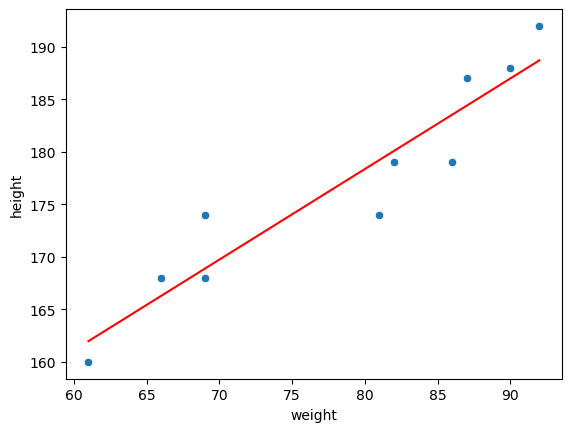

In [20]:
sns.scatterplot(data=df, x='weight', y='height')
sns.lineplot(data=df, x='weight', y='pred', color='red')

In [21]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [22]:
r2 = r2_score(df['height'], df['pred'])
r2

0.8899941488785352

In [23]:
mse_2 = mean_squared_error(df['height'], df['pred'])
mse_2

10.15243999999998

In [24]:
reg.predict(df[['weight']])

array([[184.40385835],
       [179.22878362],
       [180.09129608],
       [188.71642061],
       [186.99139571],
       [161.97853455],
       [183.54134589],
       [166.29109682],
       [168.87863418],
       [168.87863418]])

In [25]:
df2 = sns.load_dataset('tips')

In [26]:
df2.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [27]:
y = df2[['tip']]
X = df2[['total_bill']]

In [28]:
reg2 = LinearRegression()
reg2.fit(X, y)

LinearRegression()

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

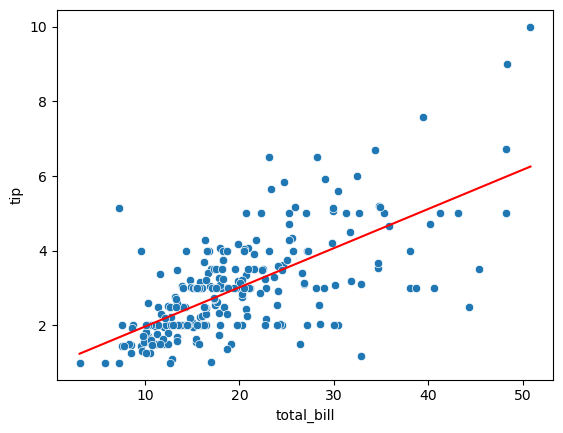

In [35]:
sns.scatterplot(data=df2, x='total_bill', y = 'tip')
sns.lineplot(data=df2, x='total_bill', y='pred', color='red')

In [31]:
w1_tip = reg2.coef_[0][0]
w0_tip = reg2.intercept_[0]

In [33]:
df2['pred'] = reg2.predict(X)

In [37]:
from sklearn.metrics import r2_score, mean_squared_error

In [39]:
tip_score = r2_score(y, df2[['pred']])
tip_mse = mean_squared_error(y, df2[['pred']])

In [40]:
tip_score

0.45661658635167657

In [41]:
tip_mse

1.036019442011377

In [42]:
from sklearn.preprocessing import LabelEncoder

In [44]:
df2

,total_bill,tip,sex,smoker,day,time,size,pred
0,16.99,1.01,Female,No,Sun,Dinner,2,2.704636
1,10.34,1.66,Male,No,Sun,Dinner,3,2.006223
2,21.01,3.50,Male,No,Sun,Dinner,3,3.126835
3,23.68,3.31,Male,No,Sun,Dinner,2,3.407250
4,24.59,3.61,Female,No,Sun,Dinner,4,3.502822
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,3.969131
240,27.18,2.00,Female,Yes,Sat,Dinner,2,3.774836
241,22.67,2.00,Male,Yes,Sat,Dinner,2,3.301175
242,17.82,1.75,Male,No,Sat,Dinner,2,2.791807


In [43]:
def get_gender(x):
    if x == 'Female':
        return 0
    else:
        return 1

In [46]:
df2['encoding'] = df2['sex'].apply(get_gender)

In [47]:
df2.head()

,total_bill,tip,sex,smoker,day,time,size,pred,encoding
0,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,0
1,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,1
2,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,1
3,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,1
4,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,0


In [49]:
reg3 = LinearRegression()
X = df2[['total_bill', 'encoding']]
y = df2[['tip']]

In [50]:
reg3.fit(X, y)

LinearRegression()

In [51]:
df2['pred2'] = reg3.predict(X)

In [52]:
mse3 = mean_squared_error(y, df2[['pred2']])
tip_score2 = r2_score(y, df2[['pred2']])

In [53]:
mse3

1.0358604137213614

In [54]:
tip_score2

0.45669999534149974

In [55]:
encoder = LabelEncoder()

In [57]:
encoder.fit(df2['sex'])

LabelEncoder()

In [59]:
df2['encoder'] = encoder.transform(df2['sex'])

In [60]:
df2.head()

,total_bill,tip,sex,smoker,day,time,size,pred,encoding,pred2,encoder
0,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,0,2.721176,0
1,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,1,1.994772,1
2,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,1,3.117602,1
3,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,1,3.398572,1
4,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,0,3.520942,0


In [64]:
df2['decoder'] = encoder.inverse_transform(df2['encoder'])

In [65]:
df2.head()

,total_bill,tip,sex,smoker,day,time,size,pred,encoding,pred2,encoder,decoder
0,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,0,2.721176,0,Female
1,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,1,1.994772,1,Male
2,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,1,3.117602,1,Male
3,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,1,3.398572,1,Male
4,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,0,3.520942,0,Female


In [74]:
df3 = pd.get_dummies(df2)
df3.head()

,total_bill,tip,size,pred,pred2,encoder,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner,encoding_1,encoding_0,decoder_Female,decoder_Male
0,16.99,1.01,2,2.704636,2.721176,0,0,1,0,1,0,0,0,1,0,1,0,1,1,0
1,10.34,1.66,3,2.006223,1.994772,1,1,0,0,1,0,0,0,1,0,1,1,0,0,1
2,21.01,3.50,3,3.126835,3.117602,1,1,0,0,1,0,0,0,1,0,1,1,0,0,1
3,23.68,3.31,2,3.407250,3.398572,1,1,0,0,1,0,0,0,1,0,1,1,0,0,1
4,24.59,3.61,4,3.502822,3.520942,0,0,1,0,1,0,0,0,1,0,1,0,1,1,0
